In [ ]:
import tensorflow as tf

print(tf.__version__)


2.3.0


In [ ]:
#https://www.tensorflow.org/tutorials/customization/basics?hl=ja
#https://www.tensorflow.org/guide/eager

In [ ]:
tf.executing_eagerly()
#TensorFlow 2.0 では、 Eager Execution はデフォルトで有効化されます。

True

In [ ]:
x = [[2.]]
m = tf.matmul(x, x)
m
#https://www.includehelp.com/python/numpy-matmul-for-matrix-multiplication.aspx

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[4.]], dtype=float32)>

In [ ]:
#定数
a = tf.constant([[1, 2],
                 [3, 4]])
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [ ]:
a.shape

TensorShape([2, 2])

In [ ]:
a.dtype

tf.int32

In [ ]:
a

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [ ]:
# ブロードキャストのサポート
b = tf.add(a, 10)
print(b)

tf.Tensor(
[[11 12]
 [13 14]], shape=(2, 2), dtype=int32)


In [ ]:
#アダマール積(要素)
a * b

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[11, 24],
       [39, 56]], dtype=int32)>

In [ ]:
import numpy as np

c = np.multiply(a, b)
c

array([[11, 24],
       [39, 56]], dtype=int32)

In [ ]:
#numpyをtensorflowで処理すると自動でtensor変換される
#逆にtensorからnumpyを取り出したければnumpyメソッドが使える

a.numpy()

array([[1, 2],
       [3, 4]], dtype=int32)

In [ ]:
#https://www.tensorflow.org/tutorials/customization/custom_layers?hl=ja
#TensorFlow には、tf.keras パッケージにKeras APIのすべてが含まれています。
#サポートできていない機能もある

In [ ]:
#https://www.tensorflow.org/guide/tensor
#テンソルの名前

In [ ]:
#gradient tape
#勾配を記録するテープと考えて

In [ ]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y = x**2


In [ ]:
import tensorflow as tf

In [ ]:
x = tf.Variable(3.0)

In [ ]:
t1 = tf.GradientTape()

In [ ]:
y = x**2

In [ ]:
t1.gradient(y, x).numpy() 

RuntimeError: ignored

In [ ]:
x = tf.constant(3.0) # TensorFlow に定数を作成
with tf.GradientTape() as g: # with 内部の計算を記録
  g.watch(x) # x を記録
  y = 2 * x # 微分する式

In [ ]:
g.gradient(y, x).numpy() 

2.0

In [ ]:
y

<tf.Tensor: shape=(), dtype=float32, numpy=9.0>

In [ ]:
x

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>

In [ ]:
tape.watch(tf.constant(10,dtype='float32'))

In [ ]:
y

<tf.Tensor: shape=(), dtype=float32, numpy=9.0>

In [ ]:
tape.gradient(y, x).numpy() 

6.0

In [ ]:
# dy = 2x * dx
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

6.0

In [ ]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]

In [ ]:
w

<tf.Variable 'w:0' shape=(3, 2) dtype=float32, numpy=
array([[-0.53397495, -1.6467439 ],
       [ 0.62531966,  0.09560457],
       [-0.45052364,  0.01607519]], dtype=float32)>

In [ ]:
b

<tf.Variable 'b:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>

In [ ]:
x

[[1.0, 2.0, 3.0]]

In [ ]:
with tf.GradientTape(persistent=True) as tape:
  y = x @ w + b
  loss = tf.reduce_mean(y**2)

In [ ]:
[dl_dw, dl_db] = tape.gradient(loss, [w, b])


In [ ]:
print(w.shape)
print(dl_dw.shape)


(3, 2)
(3, 2)


In [ ]:
tf.matmul(x,w) + b

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-0.63490653, -1.407309  ]], dtype=float32)>

In [ ]:
x @ w

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-0.63490653, -1.407309  ]], dtype=float32)>

In [ ]:
y

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-0.63490653, -1.407309  ]], dtype=float32)>

In [ ]:
with tf.GradientTape(persistent=True) as tape:
  y = x @ w + b
  loss = tf.reduce_mean(y**2)

In [ ]:
[dl_dw, dl_db] = tape.gradient(loss, [w, b])


In [ ]:
print(w.shape)
print(dl_dw.shape)

In [ ]:
dl_dw

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.63490653, -1.407309  ],
       [-1.2698131 , -2.814618  ],
       [-1.9047196 , -4.221927  ]], dtype=float32)>

In [ ]:
dl_db

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-0.63490653, -1.407309  ], dtype=float32)>

In [ ]:
#https://www.tensorflow.org/api_docs/python/tf/GradientTape

In [ ]:
#https://www.tensorflow.org/guide/autodiff

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [ ]:
x = tf.linspace(-10.0, 10.0, 200+1)

with tf.GradientTape() as tape:
  tape.watch(x)
  y = tf.nn.sigmoid(x)

dy_dx = tape.gradient(y, x)


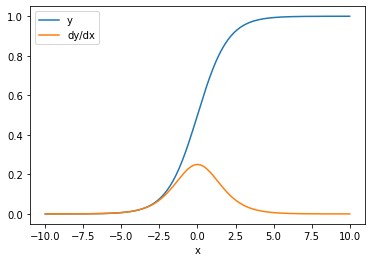

In [ ]:
plt.plot(x, y, label='y')
plt.plot(x, dy_dx, label='dy/dx')
plt.legend()
_ = plt.xlabel('x')


In [ ]:
import tensorflow as tf
import timeit
from datetime import datetime

In [ ]:
# Define a Python function
def function_to_get_faster(x, y, b):
  x = tf.matmul(x, y)
  x = x + b
  return x

# Create a `Function` object that contains a graph
a_function_that_uses_a_graph = tf.function(function_to_get_faster)

# Make some tensors
x1 = tf.constant([[1.0, 2.0]])
y1 = tf.constant([[2.0], [3.0]])
b1 = tf.constant(4.0)

# It just works!
a_function_that_uses_a_graph(x1, y1, b1).numpy()


array([[12.]], dtype=float32)

In [ ]:
function_to_get_faster(x1, y1, b1).numpy()


array([[12.]], dtype=float32)

In [ ]:
def inner_function(x, y, b):
  x = tf.matmul(x, y)
  x = x + b
  return x

def outer_function(x):
  y = tf.constant([[2.0], [3.0]])
  b = tf.constant(4.0)

  return inner_function(x, y, b)

outer_function(tf.constant([[1.0, 2.0]])).numpy()


array([[12.]], dtype=float32)

In [ ]:
#https://www.tensorflow.org/guide/autograph?hl=ja

In [ ]:
#https://www.tensorflow.org/guide/intro_to_graphs

In [ ]:
# Create an oveerride model to classify pictures
class SequentialModel(tf.keras.Model):
  def __init__(self, **kwargs):
    super(SequentialModel, self).__init__(**kwargs)
    self.flatten = tf.keras.layers.Flatten(input_shape=(28, 28))
    self.dense_1 = tf.keras.layers.Dense(128, activation="relu")
    self.dropout = tf.keras.layers.Dropout(0.2)
    self.dense_2 = tf.keras.layers.Dense(10)

  def call(self, x):
    x = self.flatten(x)
    x = self.dense_1(x)
    x = self.dropout(x)
    x = self.dense_2(x)
    return x





input_data = tf.random.uniform([60, 28, 28])

eager_model = SequentialModel()
graph_model = tf.function(eager_model)

print("Eager time:", timeit.timeit(lambda: eager_model(input_data), number=10000))
print("Graph time:", timeit.timeit(lambda: graph_model(input_data), number=10000))


Eager time: 10.72703650099993
Graph time: 5.924939439999889


In [ ]:
# The actual line
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 1000

# A vector of random x values
x = tf.random.normal(shape=[NUM_EXAMPLES])

# Generate some noise
noise = tf.random.normal(shape=[NUM_EXAMPLES])

# Calculate y
y = x * TRUE_W + TRUE_B + noise

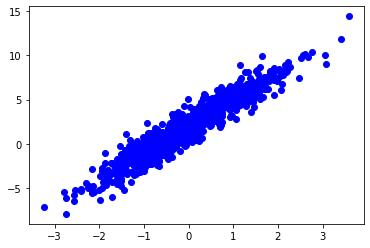

In [ ]:
# Plot all the data
import matplotlib.pyplot as plt

plt.scatter(x, y, c="b")
plt.show()


In [ ]:
class MyModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    # Initialize the weights to `5.0` and the bias to `0.0`
    # In practice, these should be randomly initialized
    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return self.w * x + self.b

model = MyModel()

# List the variables tf.modules's built-in variable aggregation.
print("Variables:", model.variables)

# Verify the model works
assert model(3.0).numpy() == 15.0


Variables: (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)


In [ ]:
y

<tf.Tensor: shape=(1000,), dtype=float32, numpy=
array([-2.00035286e+00,  6.35696936e+00, -4.56683397e+00,  3.51694155e+00,
        3.28211546e+00, -3.44329548e+00, -7.37626493e-01,  2.82664478e-01,
        5.59374046e+00,  9.86666107e+00,  2.32327604e+00, -1.66335952e+00,
        1.81549561e+00, -1.24233198e+00,  7.65250504e-01, -3.29098773e+00,
        1.25050223e+00,  4.32219267e+00,  4.18545151e+00, -3.33406734e+00,
       -2.60918856e-01,  8.25507259e+00,  2.50820136e+00,  2.55845976e+00,
        2.15578508e+00,  6.15732718e+00,  6.88328838e+00,  2.07547164e+00,
       -8.38419795e-01,  6.30550432e+00,  1.00763977e+00,  2.01169109e+00,
        2.77925777e+00, -1.10934949e+00,  5.39126492e+00,  2.71526051e+00,
        9.45706308e-01, -2.51577473e+00,  1.53475821e-01,  5.62272882e+00,
        6.61755323e-01,  2.23203015e+00,  3.97132707e+00,  5.65295601e+00,
        1.90423012e+00,  3.97302365e+00, -2.28205109e+00,  4.90948582e+00,
       -8.07940722e-01,  3.14351702e+00,  5.6030678

In [ ]:
model(x)

<tf.Tensor: shape=(1000,), dtype=float32, numpy=
array([-7.85035086e+00,  7.81209517e+00, -7.99757051e+00,  3.26462030e+00,
        4.74674988e+00, -7.79062700e+00, -5.47898293e+00, -2.95280957e+00,
        5.86925507e+00,  8.23187447e+00, -2.02526474e+00, -5.66158724e+00,
       -2.04738903e+00, -4.15793657e+00, -1.72084820e+00, -8.51425457e+00,
       -4.31197262e+00,  4.67290592e+00,  5.43926716e+00, -6.23506784e+00,
       -5.67999935e+00,  7.58511114e+00,  1.40954280e+00,  1.04579210e-01,
        2.32919455e-01,  5.91721439e+00,  6.87325573e+00, -6.80127501e-01,
       -2.71151757e+00,  4.96872711e+00, -7.06448197e-01,  1.07123053e+00,
       -2.81230092e-01, -6.40669060e+00,  3.68017054e+00, -7.41931438e-01,
       -5.90190113e-01, -6.13544416e+00, -4.64166117e+00,  4.79236317e+00,
       -4.58463717e+00,  1.76340652e+00,  3.62747073e+00,  1.68894744e+00,
       -4.14022766e-02,  4.56019735e+00, -4.57552195e+00,  5.04628897e+00,
       -1.99846995e+00,  4.84139490e+00,  6.0740213

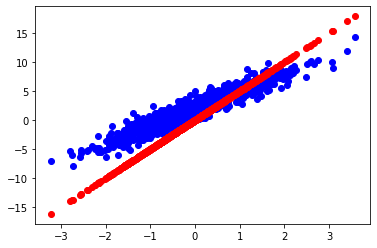

In [ ]:
plt.scatter(x, y, c="b")
plt.scatter(x, model(x), c="r")
plt.show()

In [ ]:
# This computes a single loss value for an entire batch
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y - predicted_y))

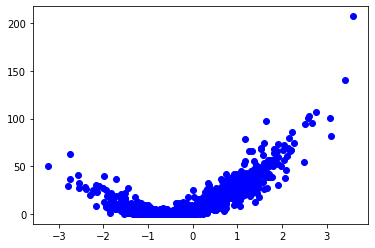

In [ ]:
plt.scatter(x, tf.square(y, tf.square(y, model(x))).numpy(), c="b")
plt.show()

In [ ]:

def train(model, x, y, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(y, model(x))

  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)


In [ ]:
model = MyModel()

Ws, bs = [], []
epochs = range(10)

def training_loop(model, x, y):

  for epoch in epochs:
    train(model, x, y, learning_rate=0.1)

    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(y, model(x))

    print("Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f" %
          (epoch, Ws[-1], bs[-1], current_loss))


Starting: W=5.00 b=0.00, loss=9.34465
Epoch  0: W=4.57 b=0.42, loss=6.15553
Epoch  1: W=4.24 b=0.75, loss=4.18025
Epoch  2: W=3.97 b=1.00, loss=2.95675
Epoch  3: W=3.76 b=1.21, loss=2.19888
Epoch  4: W=3.60 b=1.37, loss=1.72941
Epoch  5: W=3.48 b=1.50, loss=1.43857
Epoch  6: W=3.38 b=1.60, loss=1.25840
Epoch  7: W=3.30 b=1.68, loss=1.14677
Epoch  8: W=3.24 b=1.74, loss=1.07761
Epoch  9: W=3.19 b=1.79, loss=1.03475


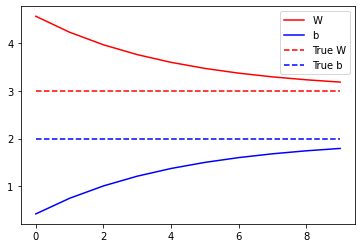

In [ ]:
print("Starting: W=%1.2f b=%1.2f, loss=%2.5f" %
      (model.w, model.b, loss(y, model(x))))

training_loop(model, x, y)

plt.plot(epochs, Ws, "r",
         epochs, bs, "b")

plt.plot([TRUE_W] * len(epochs), "r--",
         [TRUE_B] * len(epochs), "b--")

plt.legend(["W", "b", "True W", "True b"])
plt.show()


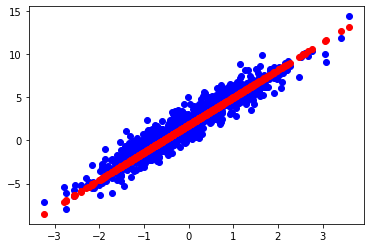

Current loss: 1.034750


In [ ]:
# Visualize how the trained model performs
plt.scatter(x, y, c="b")
plt.scatter(x, model(x), c="r")
plt.show()

print("Current loss: %1.6f" % loss(model(x), y).numpy())


In [ ]:
#いよいよkeras化
#tensorがいかに楽になるか
#可変長引数 **kwargs

In [ ]:
class MyModelKeras(tf.keras.Model):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)

    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x, **kwargs):
    return self.w * x + self.b

keras_model = MyModelKeras()

training_loop(keras_model, x, y)

keras_model.save_weights("my_checkpoint")


Epoch  0: W=4.57 b=0.42, loss=6.15553
Epoch  1: W=4.24 b=0.75, loss=4.18025
Epoch  2: W=3.97 b=1.00, loss=2.95675
Epoch  3: W=3.76 b=1.21, loss=2.19888
Epoch  4: W=3.60 b=1.37, loss=1.72941
Epoch  5: W=3.48 b=1.50, loss=1.43857
Epoch  6: W=3.38 b=1.60, loss=1.25840
Epoch  7: W=3.30 b=1.68, loss=1.14677
Epoch  8: W=3.24 b=1.74, loss=1.07761
Epoch  9: W=3.19 b=1.79, loss=1.03475


In [ ]:
keras_model = MyModelKeras()

keras_model.compile(
    run_eagerly=False,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    loss=tf.keras.losses.mean_squared_error,
)


In [ ]:
keras_model.fit(x, y, epochs=10, batch_size=1000)

Epoch 1/10
1/1 [==============================] - 0s 1ms/step - loss: 9.3447
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 6.1555
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 4.1803
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 2.9568
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 2.1989
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 1.7294
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 1.4386
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 1.2584
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 1.1468
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 1.0776


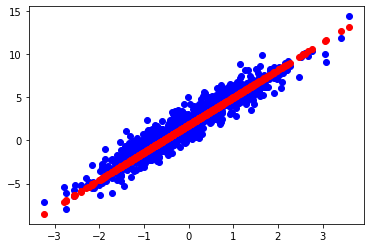

Current loss: 1.034750


In [ ]:
plt.scatter(x, y, c="b")
plt.scatter(x, keras_model(x), c="r")
plt.show()

print("Current loss: %1.6f" % loss(keras_model(x), y).numpy())

In [ ]:
#https://www.tensorflow.org/guide/basic_training_loops

In [ ]:
#いったんclassと親子クラスの継承、superについても

In [ ]:
class Person():
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def say_name(self):
        print("私の名前は" + self.name + "です。年齢は" + str(self.age) + "歳です。")


class JapanesePerson(Person):
    def __init__(self, name, age):
        super().__init__(name, age)

    def say_hello(self):
        print("こんにちは")


yamada = JapanesePerson("山田", 20)
yamada.say_name()
yamada.say_hello()

In [ ]:
import tensorflow as tf

In [ ]:
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
train_images, train_labels = train
test_images, test_labels = test

#npyならload
#csvならpd.read_csv

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
test_labels.shape

(10000,)

In [ ]:
test_labels[0:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

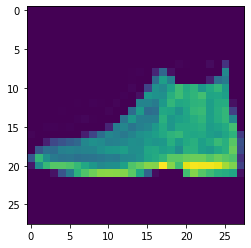

In [ ]:
plt.imshow(test_images[0])

In [ ]:
images, labels = train
images = images/255

dataset = tf.data.Dataset.from_tensor_slices((images, labels))
dataset

In [ ]:
#おもみ
#https://www.tensorflow.org/guide/checkpoint

In [ ]:
#もでる
#https://www.tensorflow.org/guide/saved_model

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


In [ ]:
#シーケンシャルモデル

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
# Call model on a test input
x = tf.ones((3, 3))
y = model(x)


In [ ]:
# Create 3 layers
layer1 = layers.Dense(2, activation="relu", name="layer1")
layer2 = layers.Dense(3, activation="relu", name="layer2")
layer3 = layers.Dense(4, name="layer3")

# Call layers on a test input
x = tf.ones((3, 3))
y = layer3(layer2(layer1(x)))


In [ ]:
#自由度がない
 シーケンシャルモデルは、次の場合には適切ではありません。
    モデルに複数の入力または複数の出力があります
    いずれかのレイヤーに複数の入力または複数の出力があります
    レイヤー共有を行う必要があります
    非線形トポロジが必要です（たとえば、残余接続、マルチブランチモデル）

IndentationError: ignored

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)


In [ ]:
model.layers

In [ ]:
#ディクショナリ型は見ていてわかりにくい
#もしくはaddメソッドで層構造にする

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(4))


In [ ]:
model.pop()
print(len(model.layers))  # 0,1、2


2


In [ ]:
#name引数は層情報の取得や、tensor bordに渡す時に重要

model = tf.keras.Sequential(name="my_sequential")
model.add(layers.Dense(2, activation="relu", name="layer1"))
model.add(layers.Dense(3, activation="relu", name="layer2"))
model.add(layers.Dense(4, name="layer3"))


In [ ]:
model

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
# kerasはinputが決まっていないといけない
#バッチは自由

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(4,)))
model.add(layers.Dense(2, activation="relu"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2)                 10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#ワンライナで描くならlayersの引数にinputを渡す

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu", input_shape=(4,)))

model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 2)                 10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# addメソッドは途中でモデル構造を確認できるので便利


In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(250, 250, 3)))  # 250x250 RGB images
model.add(layers.Conv2D(32, 5, strides=2, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))

# Can you guess what the current output shape is at this point? Probably not.
# Let's just print it:
model.summary()
#一旦ここまで作ってsymmaryで確認

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 123, 123, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 121, 121, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 32)        0         
Total params: 11,680
Trainable params: 11,680
Non-trainable params: 0
_________________________________________________________________


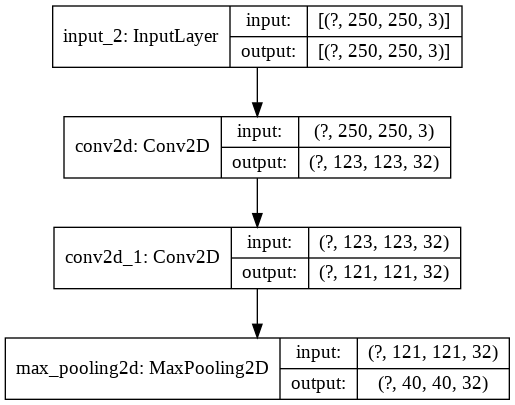

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(
    model,
    show_shapes=True,
)

In [ ]:

# The answer was: (40, 40, 32), so we can keep downsampling...

model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(2))

# And now?
model.summary()

# Now that we have 4x4 feature maps, time to apply global max pooling.
model.add(layers.GlobalMaxPooling2D())

# Finally, we add a classification layer.
model.add(layers.Dense(10))


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 123, 123, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 121, 121, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 36, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 32)       

In [ ]:
#https://keras.io/ja/visualization/

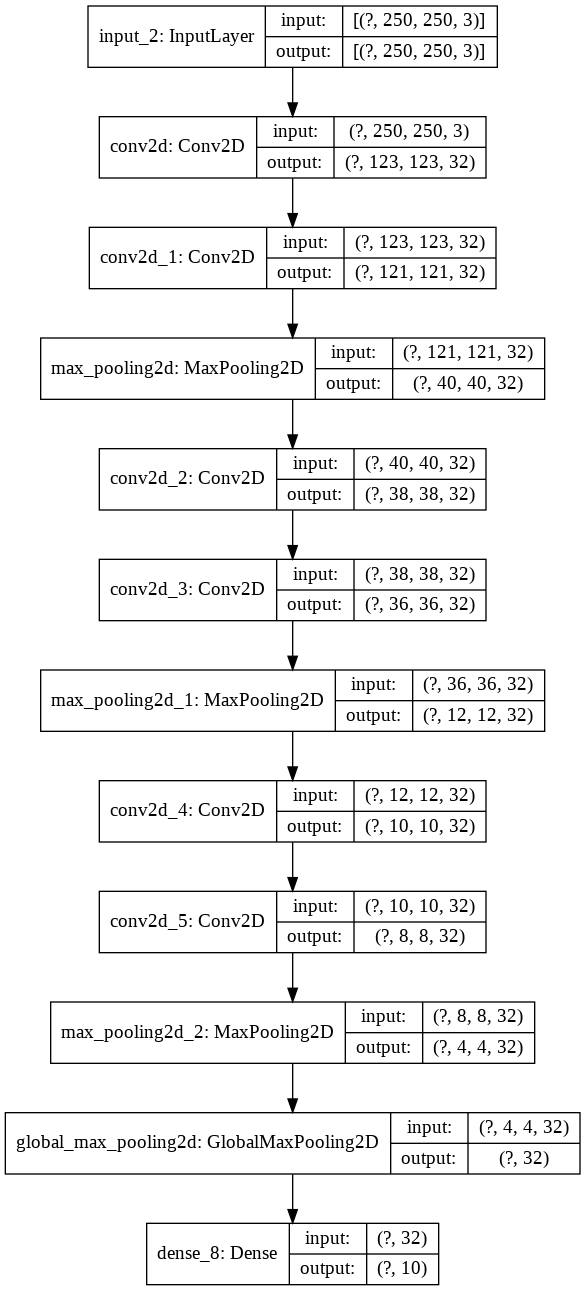

In [ ]:
plot_model(
    model,
    show_shapes=True,
)

In [ ]:
#特徴量を取り出す

In [ ]:
initial_model = keras.Sequential(
    [
        keras.Input(shape=(250, 250, 3)),
        layers.Conv2D(32, 5, strides=2, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
    ]
)
feature_extractor = keras.Model(
    inputs=initial_model.inputs,
    outputs=[layer.output for layer in initial_model.layers],
)

# Call feature extractor on test input.
x = tf.ones((1, 250, 250, 3))
features = feature_extractor(x)


In [ ]:
# 転移学習

In [ ]:
https://www.tensorflow.org/guide/keras/sequential_model

In [ ]:
https://www.tensorflow.org/tutorials/customization/custom_layers?hl=ja

In [ ]:
https://www.ossnews.jp/compare/TensorFlow/Keras

In [3]:
import tensorflow as tf

In [8]:
# Load a convolutional base with pre-trained weights
base_model = tf.keras.applications.Xception(
    weights='imagenet',
    include_top=False,
    pooling='avg')

# Freeze the base model
base_model.trainable = False

# Use a Sequential model to add a trainable classifier on top
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dense(1000),
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 2048)              20861480  
_________________________________________________________________
dense (Dense)                (None, 1000)              2049000   
Total params: 22,910,480
Trainable params: 2,049,000
Non-trainable params: 20,861,480
_________________________________________________________________


In [12]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(784)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10),
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Presumably you would want to first load pre-trained weights.
#model.load_weights(...)

# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False



In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 27,562
Trainable params: 330
Non-trainable params: 27,232
_________________________________________________________________


In [26]:
model.layers[1].trainable = True

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 27,562
Trainable params: 1,386
Non-trainable params: 26,176
_________________________________________________________________


In [28]:
for l in model.layers:
    print(l.name, l.trainable)

dense_1 False
dense_2 True
dense_3 False
dense_4 True


In [ ]:
model.get_layer('Layer_2').trainable = False

In [ ]:
# Recompile and train (this will only update the weights of the last layer).
model.compile(...)
model.fit(...)


In [ ]:
#sequencial でなく functional

#実現したいように弄りやすい
#複雑構造も実現できる

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
inputs = keras.Input(shape=(784,))


In [ ]:
#img_inputs = keras.Input(shape=(32, 32, 3))


In [ ]:
inputs.shape

In [ ]:
inputs.dtype

In [ ]:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)


In [ ]:
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)


In [ ]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")


In [ ]:
model.summary()


In [ ]:
keras.utils.plot_model(model, "my_first_model.png")


In [ ]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)


In [31]:
import tensorflow as tf
import tensorflow.keras as keras

In [32]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255


11493376/11490434 [==============================] - 0s 0us/step


In [34]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

In [35]:


history = model.fit(x_train, y_train, batch_size=64,
                    epochs=2, validation_split=0.2)



Epoch 1/2
750/750 [==============================] - 1s 2ms/step - loss: 1.6085 - accuracy: 0.5088 - val_loss: 1.1617 - val_accuracy: 0.6394
Epoch 2/2
750/750 [==============================] - 1s 1ms/step - loss: 1.0972 - accuracy: 0.6437 - val_loss: 1.0148 - val_accuracy: 0.6726
313/313 - 0s - loss: 1.0380 - accuracy: 0.6633
Test loss: 1.0380421876907349
Test accuracy: 0.6632999777793884


In [ ]:
test_scores = model.evaluate(x_test, y_test, verbose=2)


In [ ]:
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])


In [ ]:
model.save("path_to_my_model")

In [ ]:
del model

In [ ]:
model = keras.models.load_model("path_to_my_model")


In [37]:
import tensorflow.keras.layers as layers

In [38]:
encoder_input = keras.Input(shape=(28, 28, 1), name="img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()



Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                0   

In [39]:
#一度modelで立てたネットワークをレイヤとして扱う
#inputとoutputが繋がっていれば成り立つ

In [40]:
x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()


Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                

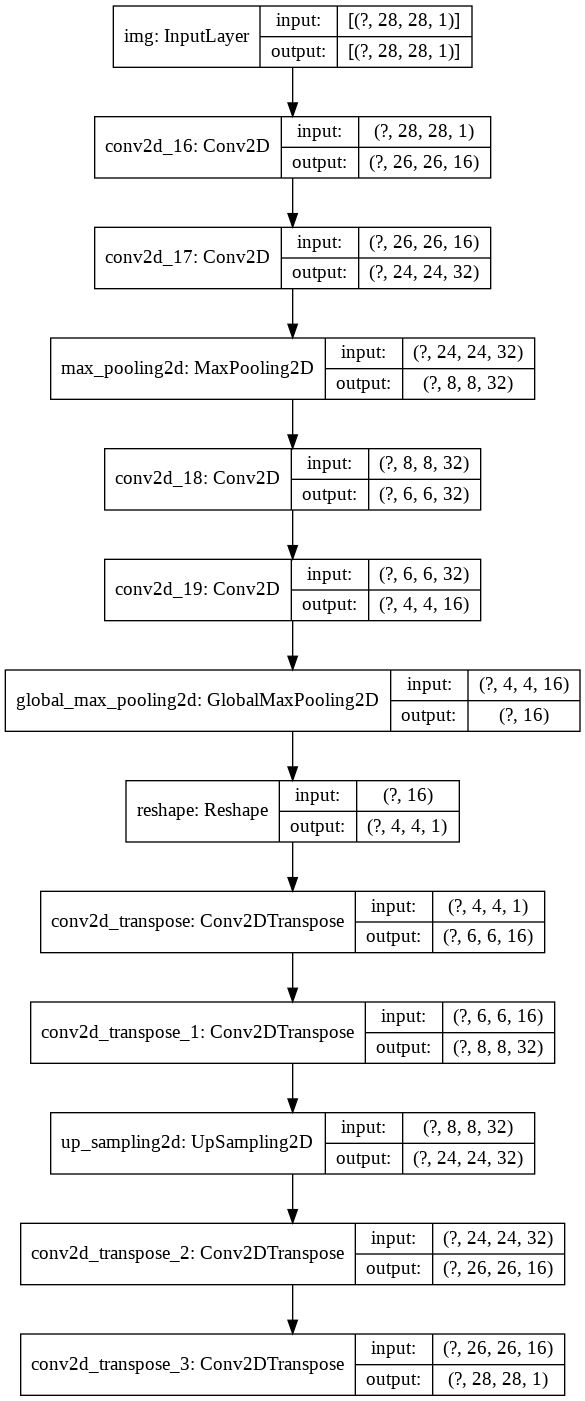

In [41]:
keras.utils.plot_model(autoencoder, show_shapes=True)

In [ ]:
#こんな立て方も出来るので、
#上記のようにinputにネットワークをつないで層を追加する方法もあり、
#小さいモジュール化を一つの層とすることで、ネットワークの修正を行いやすくすることもできる
#修正というか。ネットワークを変える場合にinputを探す必要がなくなる

In [43]:
decoder_input = keras.Input(shape=(16,), name="encoded_img")
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

decoder = keras.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()


Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoded_img (InputLayer)     [(None, 16)]              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 1)           0         
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 6, 6, 16)          160       
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 8, 8, 32)          4640      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 26, 26, 16)        4624      
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 28, 28, 1)         145 

In [44]:
autoencoder_input = keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 16)                18672     
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         9569      
Total params: 28,241
Trainable params: 28,241
Non-trainable params: 0
_________________________________________________________________


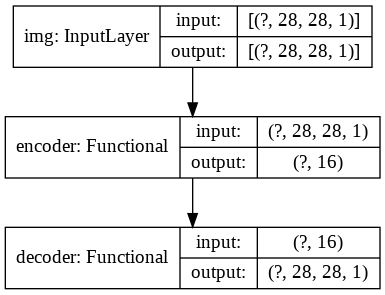

In [45]:
keras.utils.plot_model(autoencoder, show_shapes=True)

In [ ]:
#独立で並列のモデル出力をアンサンブルする
#出力を保存して平均でなく、model outputの層で処理できる。

In [ ]:
def get_model():
    inputs = keras.Input(shape=(128,))
    outputs = layers.Dense(1)(inputs)
    return keras.Model(inputs, outputs)

In [ ]:
model1 = get_model()
model2 = get_model()
model3 = get_model()

In [ ]:
inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1, y2, y3])

In [ ]:
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
#より複雑なモデル

In [ ]:
num_tags = 12  # Number of unique issue tags
num_words = 10000  # Size of vocabulary obtained when preprocessing text data
num_departments = 4  # Number of departments for predictions

title_input = keras.Input(
    shape=(None,), name="title"
)  # Variable-length sequence of ints
body_input = keras.Input(shape=(None,), name="body")  # Variable-length sequence of ints
tags_input = keras.Input(
    shape=(num_tags,), name="tags"
)  # Binary vectors of size `num_tags`

# Embed each word in the title into a 64-dimensional vector
title_features = layers.Embedding(num_words, 64)(title_input)
# Embed each word in the text into a 64-dimensional vector
body_features = layers.Embedding(num_words, 64)(body_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = layers.LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = layers.LSTM(32)(body_features)

# Merge all available features into a single large vector via concatenation
x = layers.concatenate([title_features, body_features, tags_input])

# Stick a logistic regression for priority prediction on top of the features
priority_pred = layers.Dense(1, name="priority")(x)
# Stick a department classifier on top of the features
department_pred = layers.Dense(num_departments, name="department")(x)

# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(
    inputs=[title_input, body_input, tags_input],
    outputs=[priority_pred, department_pred],
)


In [ ]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)


In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss={
        "priority": keras.losses.BinaryCrossentropy(from_logits=True),
        "department": keras.losses.CategoricalCrossentropy(from_logits=True),
    },
    loss_weights=[1.0, 0.2],
)


In [ ]:
# Dummy input data
title_data = np.random.randint(num_words, size=(1280, 10))
body_data = np.random.randint(num_words, size=(1280, 100))
tags_data = np.random.randint(2, size=(1280, num_tags)).astype("float32")

# Dummy target data
priority_targets = np.random.random(size=(1280, 1))
dept_targets = np.random.randint(2, size=(1280, num_departments))

model.fit(
    {"title": title_data, "body": body_data, "tags": tags_data},
    {"priority": priority_targets, "department": dept_targets},
    epochs=2,
    batch_size=32,
)


In [49]:
import numpy as np


In [ ]:
#vgg19から特徴量を吸い出す

In [46]:
vgg19 = tf.keras.applications.VGG19()


574717952/574710816 [==============================] - 3s 0us/step


In [47]:
features_list = [layer.output for layer in vgg19.layers]


In [50]:
feat_extraction_model = keras.Model(inputs=vgg19.input, outputs=features_list)

img = np.random.random((1, 224, 224, 3)).astype("float32")
extracted_features = feat_extraction_model(img)
